In [1]:
import tensorflow as tf
from tensorflow import keras  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

## Data import

In [2]:
data = pd.read_csv('C:/workspaceWin/DataScience/learnTensorflow/Santander.csv')
data.head()
# Target = 0 : not satisfied

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
data.shape

(76020, 371)

In [4]:
X = data.drop(labels=['ID','TARGET'],axis=1)
X.shape

(76020, 369)

In [5]:
y = data['TARGET']
y.shape

(76020,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [7]:
X_train.shape,X_test.shape

((60816, 369), (15204, 369))

## Remove constant, quasi-constant and duplicate features

In [8]:
filter = VarianceThreshold(0.01)
X_train=filter.fit_transform(X_train)
X_test=filter.transform(X_test)
X_train.shape,X_test.shape

((60816, 273), (15204, 273))

## Remove duplicate features

In [9]:
X_train_T = X_train.T
X_test_T = X_test.T
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)
X_train_T.shape,X_test_T.shape

((273, 60816), (273, 15204))

In [10]:
X_train_T.duplicated().sum()

17

In [11]:
duplicated_features = X_train_T.duplicated()
duplicated_features
# true = duplicated

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [12]:
features_to_keep = [not index for index in duplicated_features]
features_to_keep
# true = keep this feature

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [13]:
X_train=X_train_T[features_to_keep].T

In [14]:
X_test=X_test_T[features_to_keep].T

In [15]:
X_train.shape,X_test.shape

((60816, 256), (15204, 256))

## Normalization

In [16]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[ 3.80478472e-02, -5.56029626e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -1.83006062e-01],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  1.17499225e+00],
       ...,
       [ 3.80478472e-02,  5.99731758e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -2.41865113e-01],
       [ 3.80478472e-02, -1.70775831e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02,  2.91528722e-01,  7.65192053e+00, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03]])

In [19]:
X_train.shape,X_test.shape

((60816, 256), (15204, 256))

## Data Reshape for CNN

In [20]:
X_train=X_train.reshape(60816,256,1)
X_test=X_test.reshape(15204,256,1)

In [21]:
X_train.shape,X_test.shape

((60816, 256, 1), (15204, 256, 1))

In [22]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

## CNN Model

In [23]:
model=Sequential()

model.add(Conv1D(filters=32,kernel_size=3,activation='relu',input_shape=(256,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(filters=128,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 254, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 127, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 64)            0

In [25]:
model.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1)

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
60816/60816 [==============================] - 15s 249us/sample - loss: 0.2185 - acc: 0.9532 - val_loss: 0.1785 - val_acc: 0.9605
Epoch 2/10
60816/60816 [==============================] - 12s 198us/sample - loss: 0.1770 - acc: 0.9595 - val_loss: 0.1750 - val_acc: 0.9603
Epoch 3/10
60816/60816 [==============================] - 12s 198us/sample - loss: 0.1669 - acc: 0.9602 - val_loss: 0.1701 - val_acc: 0.9605
Epoch 4/10
60816/60816 [==============================] - 12s 198us/sample - loss: 0.1651 - acc: 0.9602 - val_loss: 0.1667 - val_acc: 0.9604
Epoch 5/10
60816/60816 [==============================] - 12s 198us/sample - loss: 0.1632 - acc: 0.9603 - val_loss: 0.1676 - val_acc: 0.9605
Epoch 6/10
60816/60816 [==============================] - 12s 199us/sample - loss: 0.1609 - acc: 0.9604 - val_loss: 0.1625 - val_acc: 0.9601
Epoch 7/10
60816/60816 [==============================] - 12s 199us/sample - loss: 0.1576 - acc: 0.9604 

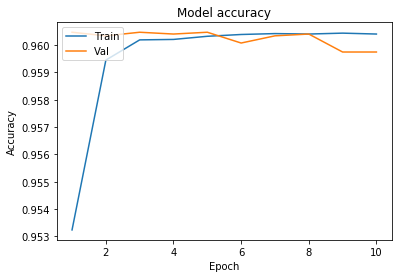

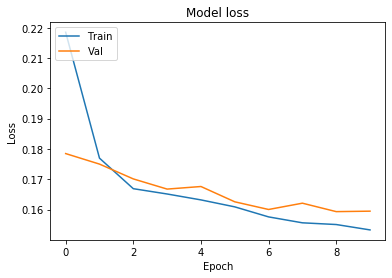

In [27]:
epoch_range=range(1,10+1)
plt.plot(epoch_range,history.history['acc'])
plt.plot(epoch_range,history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [ ]:
# val_acc train_acc almost the same, neither over fitting nor under fitting
# optimal for 6-7 epochs